## EDA

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")

In [2]:
# Show plots in notebook
%matplotlib inline

### Data Exploration

In [ ]:
# Load the raw dataset
df = pd.read_csv('covidcast_new-2.csv')

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (25626, 19)


,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
0,1/7/2021,1000,34.412959,12.541558,1.464798,65.771681,22.086274,52.854667,29.288429,30.487852,57.334785,3.244379,2.6382,28.469582,18.571266,9.482316,24.962112,84.311759,12.627098
1,1/7/2021,1003,32.814153,10.189340,1.270183,61.516584,25.179399,51.160278,NaN,28.384842,53.172285,1.199572,NaN,27.532881,23.406516,8.933682,28.864558,82.778220,11.727249
2,1/7/2021,1015,35.621311,14.591271,6.594649,NaN,NaN,54.503711,NaN,37.003522,NaN,3.890709,NaN,NaN,20.974363,NaN,NaN,NaN,13.255336
3,1/7/2021,1051,40.453615,14.164503,3.320922,68.718538,19.438763,54.948755,NaN,37.637900,67.550815,3.284647,NaN,30.223647,20.009477,7.570250,26.494057,86.587182,13.823318
4,1/7/2021,1069,39.228766,10.103564,0.288897,59.961036,23.065494,60.118290,NaN,36.156326,55.995745,1.881970,NaN,30.806929,16.574756,12.916249,24.747620,85.825453,10.258936


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25626 entries, 0 to 25625
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   time_value                            25626 non-null  object 
 1   geo_value                             25626 non-null  int64  
 2   smoothed_wspent_time_1d               25066 non-null  float64
 3   smoothed_wtested_14d                  24688 non-null  float64
 4   smoothed_wpublic_transit_1d           25066 non-null  float64
 5   smoothed_wworried_become_ill          22515 non-null  float64
 6   smoothed_wvaccine_likely_govt_health  21257 non-null  float64
 7   smoothed_wshop_1d                     25066 non-null  float64
 8   smoothed_wtested_positive_14d         3994 non-null   float64
 9   smoothed_wwork_outside_home_1d        25066 non-null  float64
 10  smoothed_wothers_masked               22097 non-null  float64
 11  smoothed_wcli  

In [ ]:
# Inspect missingness per column
print("Missing values per column:")
missing_values = df.isna().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_df

Missing values per column:


,Missing Values,Percentage (%)
smoothed_wtested_positive_14d,21632,84.414267
smoothed_wvaccine_likely_politicians,4503,17.571997
smoothed_wvaccine_likely_govt_health,4369,17.049091
smoothed_wvaccine_likely_who,4356,16.998361
smoothed_wvaccine_likely_friends,4260,16.623742
smoothed_wwearing_mask,3641,14.208226
smoothed_wothers_masked,3529,13.771170
smoothed_wworried_become_ill,3111,12.140014
smoothed_wcovid_vaccinated,2602,10.153750
smoothed_wtested_14d,938,3.660345


In [ ]:
df.describe()

,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
count,25626.000000,25066.000000,24688.000000,25066.000000,22515.000000,21257.000000,25066.000000,3994.000000,25066.000000,22097.000000,25481.000000,23024.000000,21366.000000,25066.000000,21123.000000,21270.000000,21985.000000,25066.000000
mean,30022.116717,31.899631,13.120482,2.891016,68.690158,31.117297,53.524201,17.250770,33.999334,81.330137,1.055272,13.674725,34.275744,15.422098,10.100442,36.036825,91.912426,8.514499
std,15464.317094,6.038189,4.640677,2.661727,5.684796,6.641353,5.625381,7.419522,6.310551,12.676522,0.694818,6.665828,5.137006,6.014144,3.353021,7.192531,5.103774,4.269184
min,1000.000000,11.685945,2.144153,0.095057,40.062171,11.408837,32.682451,1.548609,11.041209,22.668564,0.000000,0.891041,15.283547,0.367614,1.256728,13.241941,58.270015,0.274725
25%,17113.000000,27.811878,9.890346,1.565133,65.117334,26.385056,49.588164,11.616797,29.658307,75.032420,0.560933,8.333788,30.858041,10.896965,7.709210,30.833044,89.285249,5.254783
50%,33005.000000,31.685359,12.451805,2.384280,69.024887,30.788040,53.015007,16.530456,33.731881,85.196143,0.942783,12.773208,34.188723,15.375892,9.852045,35.865667,93.220612,7.993092
75%,42077.000000,35.744053,15.601016,3.461986,72.587625,35.415755,57.217082,22.153012,38.154894,90.995163,1.436505,18.000759,37.691155,19.462221,12.118213,41.051398,95.717480,11.135571
max,56025.000000,58.805310,40.974146,36.015469,93.900646,56.214259,83.593709,46.644291,59.786678,99.373646,5.123363,45.466215,63.411506,51.142119,28.285788,62.468991,99.732673,33.337252


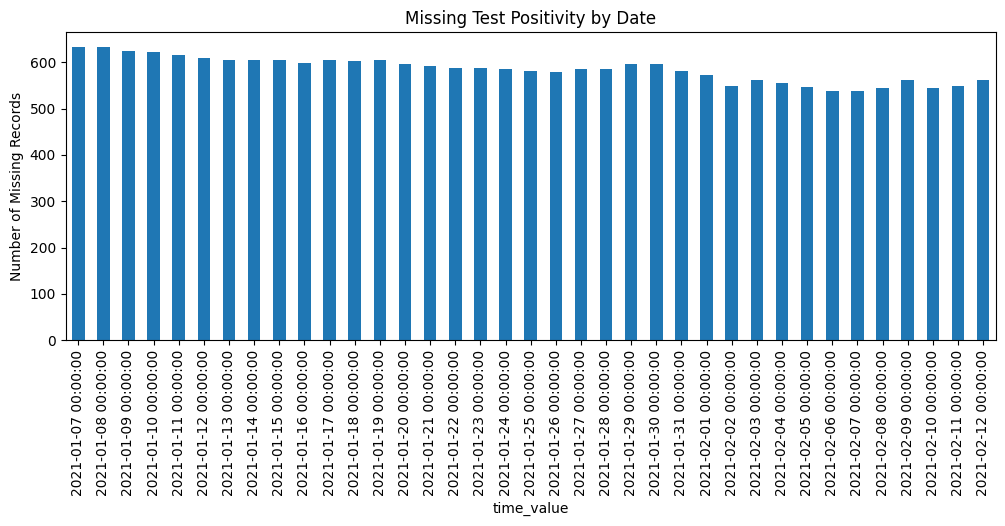

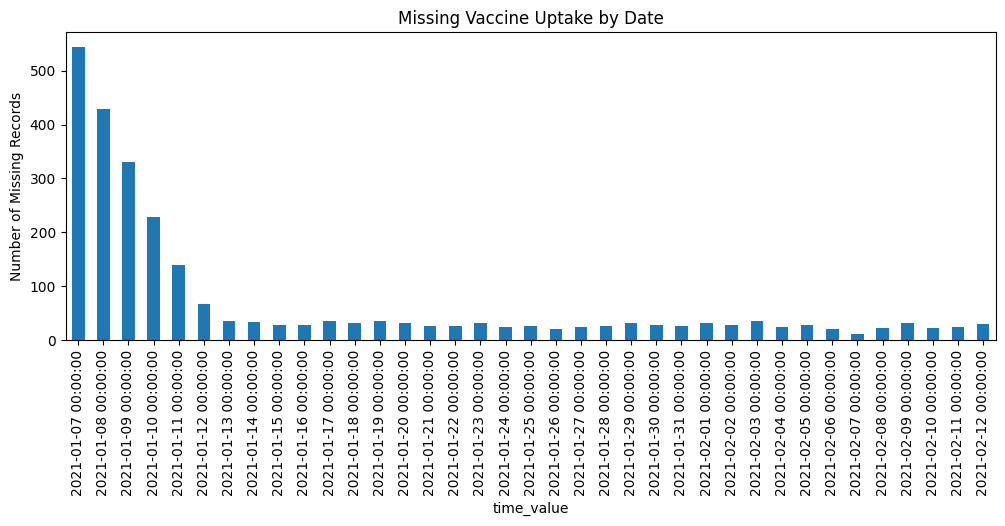

In [ ]:
# Distribution of missingness in target variables by date

# Convert time column to datetime
df['time_value'] = pd.to_datetime(df['time_value'])

# Missing test positivity by date
missing_test_by_time = df[df['smoothed_wtested_positive_14d'].isnull()]['time_value'].value_counts().sort_index()
missing_vax_by_time = df[df['smoothed_wcovid_vaccinated'].isnull()]['time_value'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
missing_test_by_time.plot(kind='bar', title="Missing Test Positivity by Date")
plt.ylabel('Number of Missing Records')
plt.show()

plt.figure(figsize=(12, 4))
missing_vax_by_time.plot(kind='bar', title="Missing Vaccine Uptake by Date")
plt.ylabel('Number of Missing Records')
plt.show()

In [ ]:
# Missing by counties
missing_pos_by_county = df[df['smoothed_wtested_positive_14d'].isnull()]['geo_value'].value_counts().head(10)
missing_vax_by_county = df[df['smoothed_wcovid_vaccinated'].isnull()]['geo_value'].value_counts().head(10)

print("Counties with most missing test positivity:\n", missing_pos_by_county)
print("\nCounties with most missing vaccine uptake:\n", missing_vax_by_county)

Counties with most missing test positivity:
 geo_value
56021    37
56000    37
55139    37
55133    37
6007     37
5143     37
5131     37
5119     37
5045     37
5031     37
Name: count, dtype: int64

Counties with most missing vaccine uptake:
 geo_value
9000     33
10000    28
15000    28
13223    20
13115    19
48037    18
25000    18
26103    16
36009    16
20209    15
Name: count, dtype: int64


### Data Imputation

In [ ]:
# Split into two subsets based on target availability

# Subset A: for predicting vaccine uptake
df_vacc = df.dropna(subset=['smoothed_wcovid_vaccinated']).copy()

# Subset B: for predicting test positivity
df_pos = df.dropna(subset=['smoothed_wtested_positive_14d']).copy()

In [ ]:
# Define predictor columns (all smoothed_ except the two targets)
predictors = [
    col for col in df.columns
    if col.startswith('smoothed_')
       and col not in ['smoothed_wcovid_vaccinated', 'smoothed_wtested_positive_14d']
]

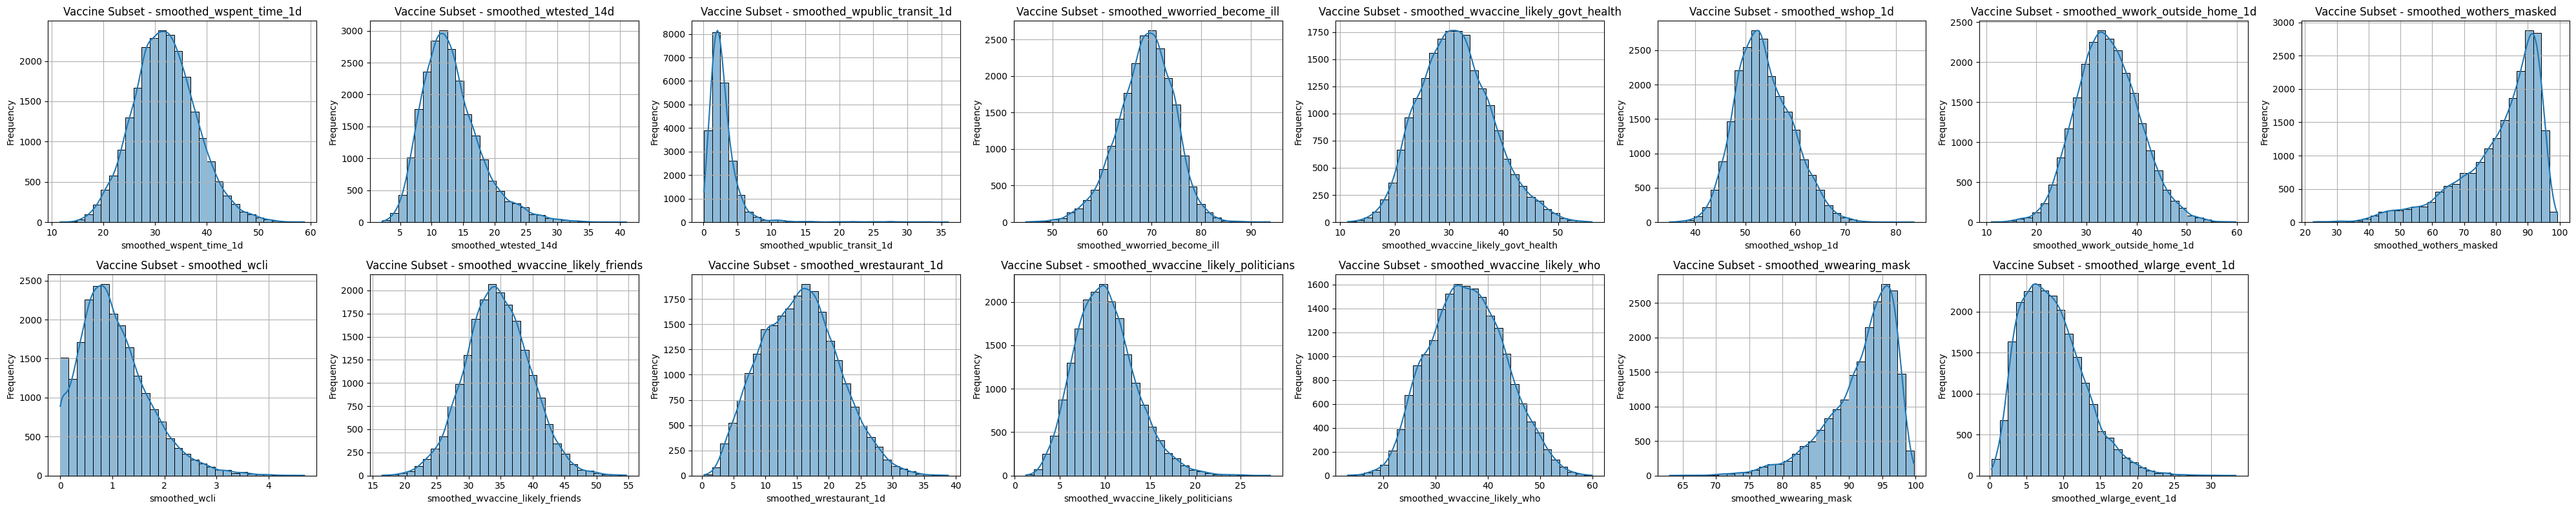

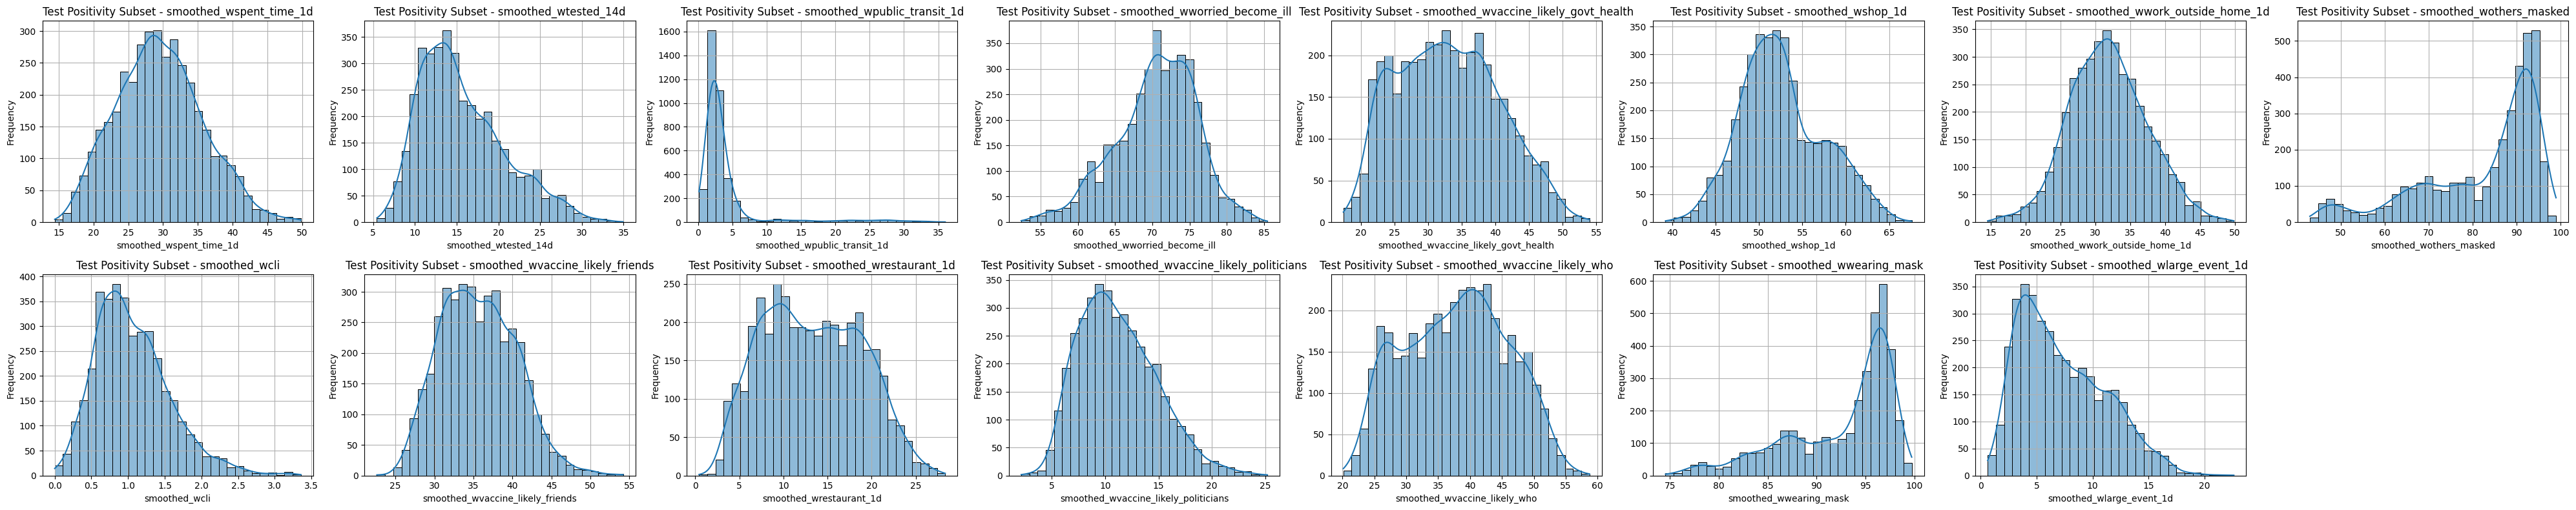

In [ ]:
# Identify columns with missing values in each subset
missing_vax = df_vacc[predictors].isnull().sum()
missing_vax = missing_vax[missing_vax > 0]

missing_pos = df_pos[predictors].isnull().sum()
missing_pos = missing_pos[missing_pos > 0]

# Plot distributions for missing columns - 4 rows total (2 for each subset)
datasets = [("Vaccine Subset", df_vacc, missing_vax), ("Test Positivity Subset", df_pos, missing_pos)]
total_rows = 4
rows_per_set = total_rows // 2

for name, data, missing in datasets:
    if len(missing) == 0:
        print(f"No missing predictors in {name}")
        continue

    n_cols = math.ceil(len(missing) / rows_per_set)
    fig, axes = plt.subplots(rows_per_set, n_cols, figsize=(n_cols * 5, rows_per_set * 4))
    axes = axes.flatten()

    for idx, col in enumerate(missing.index):
        sns.histplot(data[col], kde=True, bins=30, ax=axes[idx])
        axes[idx].set_title(f'{name} - {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel("Frequency")
        axes[idx].grid(True)

    # Hide unused axes
    for idx in range(len(missing), len(axes)):
        fig.delaxes(axes[idx])

    fig.tight_layout()
    plt.show()

In [ ]:
# Imputer using mean
imputer = SimpleImputer(strategy='mean')
df_vacc[predictors] = imputer.fit_transform(df_vacc[predictors])
df_pos [predictors] = imputer.fit_transform(df_pos [predictors])

In [ ]:
# Save the cleaned & imputed subsets
df_vacc.to_csv('df_vacc_imputed.csv', index=False)
df_pos.to_csv('df_pos_imputed.csv',  index=False)
print("Saved: df_vacc_imputed.csv and df_pos_imputed.csv")

Saved: df_vacc_imputed.csv and df_pos_imputed.csv


### Correlation Analysis

In [ ]:
# Prepare data for modeling
X_vacc = df_vacc[predictors].values
y_vacc = df_vacc['smoothed_wcovid_vaccinated'].values

X_pos  = df_pos [predictors].values
y_pos  = df_pos ['smoothed_wtested_positive_14d'].values

print(f"Vaccine subset: {X_vacc.shape[0]} samples, {X_vacc.shape[1]} features")
print(f"Positivity subset: {X_pos.shape[0]} samples, {X_pos.shape[1]} features")

Vaccine subset: 23024 samples, 15 features
Positivity subset: 3994 samples, 15 features


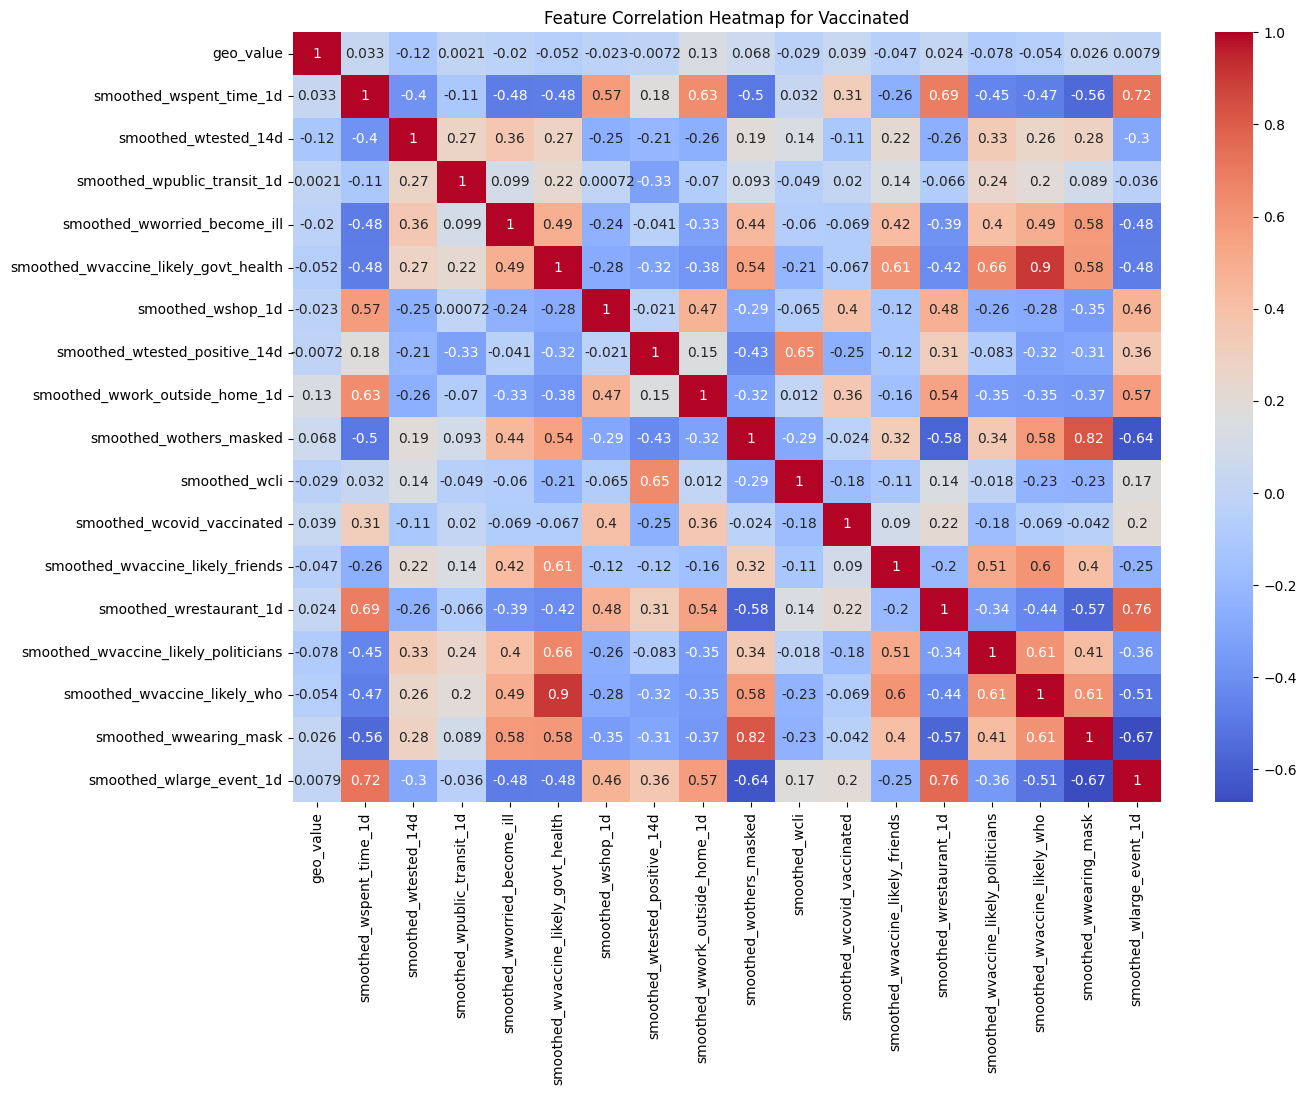

In [ ]:
# Select numeric columns only
vacc_df = df_vacc.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap for numeric columns
plt.figure(figsize=(14, 10))
sns.heatmap(vacc_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap for Vaccinated')
plt.show()

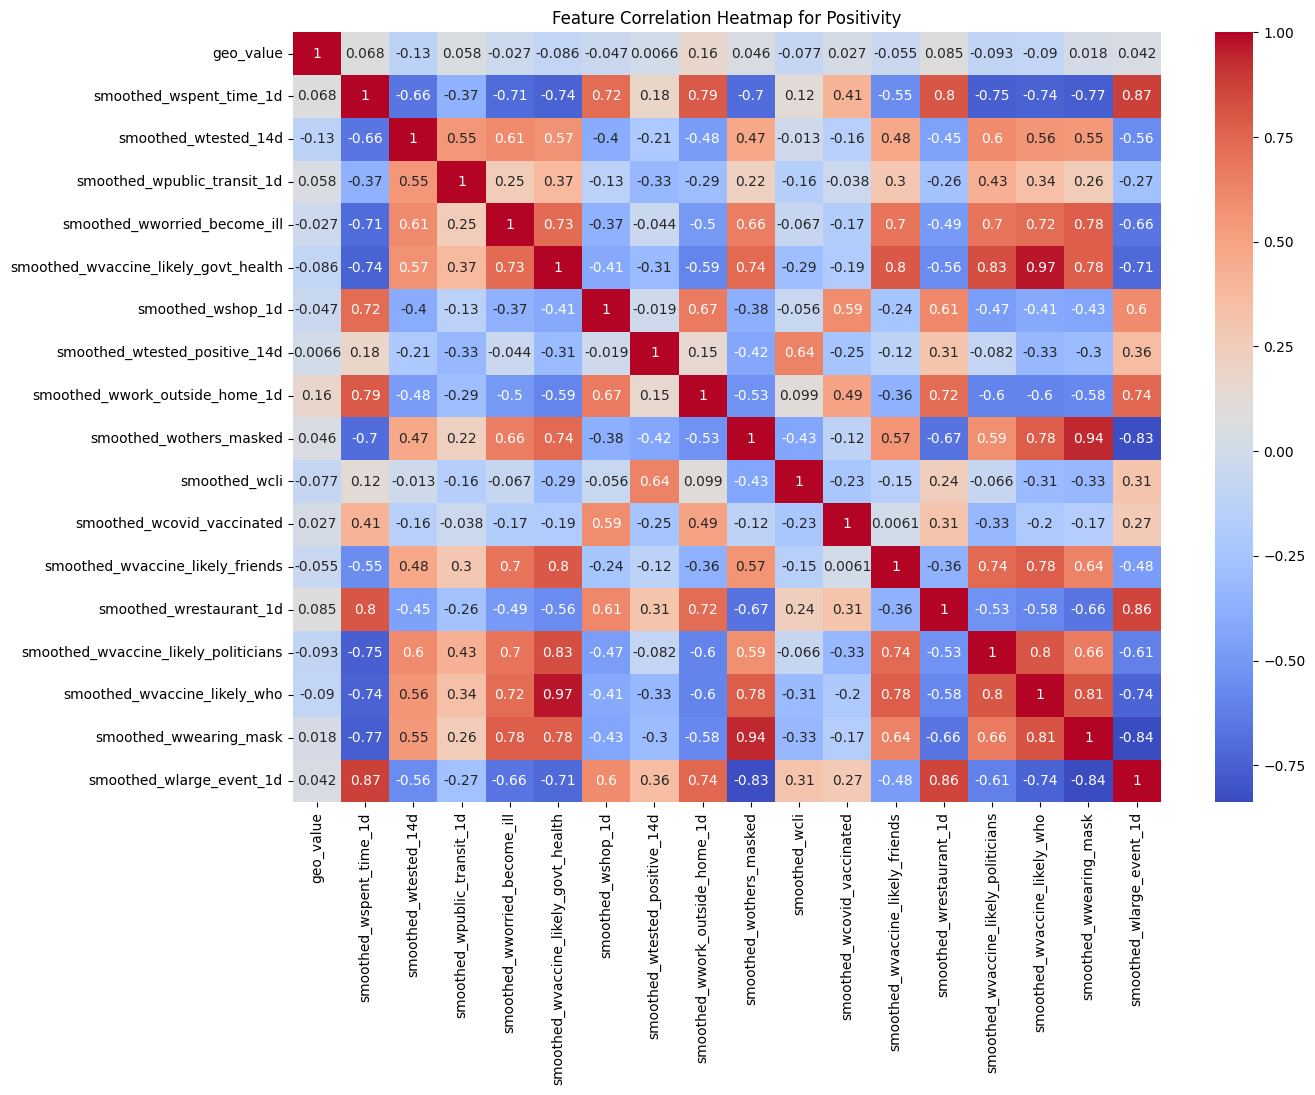

In [ ]:
# Select numeric columns only
pos_df = df_pos.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap for numeric columns
plt.figure(figsize=(14, 10))
sns.heatmap(pos_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap for Positivity')
plt.show()

In [ ]:
# Test positivity target
corr_pos = df_pos.corr()['smoothed_wtested_positive_14d'].drop('smoothed_wtested_positive_14d').sort_values(ascending=False)
print("Top features positively correlated with test positivity:\n", corr_pos.head())
print("\nTop features negatively correlated:\n", corr_pos.tail())

# Vaccine uptake target
corr_vacc = df_vacc.corr()['smoothed_wcovid_vaccinated'].drop('smoothed_wcovid_vaccinated').sort_values(ascending=False)
print("\nTop features positively correlated with vaccine uptake:\n", corr_vacc.head())
print("\nTop features negatively correlated:\n", corr_vacc.tail())


Top features positively correlated with test positivity:
 smoothed_wcli                     0.638724
smoothed_wlarge_event_1d          0.356886
smoothed_wrestaurant_1d           0.312703
smoothed_wspent_time_1d           0.177104
smoothed_wwork_outside_home_1d    0.154467
Name: smoothed_wtested_positive_14d, dtype: float64

Top features negatively correlated:
 smoothed_wwearing_mask                 -0.304809
smoothed_wvaccine_likely_govt_health   -0.313716
smoothed_wvaccine_likely_who           -0.325773
smoothed_wpublic_transit_1d            -0.326271
smoothed_wothers_masked                -0.423950
Name: smoothed_wtested_positive_14d, dtype: float64

Top features positively correlated with vaccine uptake:
 time_value                        0.760192
smoothed_wshop_1d                 0.396846
smoothed_wwork_outside_home_1d    0.359015
smoothed_wspent_time_1d           0.308041
smoothed_wrestaurant_1d           0.215985
Name: smoothed_wcovid_vaccinated, dtype: float64

Top features nega

In [ ]:
# Multicollinearity

def find_highly_correlated(df, threshold=0.85):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    return [(col, row) for col in upper.columns for row in upper.index if upper.loc[row, col] > threshold]

high_corr_test = find_highly_correlated(df_pos)
high_corr_vacc = find_highly_correlated(df_vacc)

print("Highly correlated pairs in test dataset:", high_corr_test)
print("Highly correlated pairs in vaccine dataset:", high_corr_vacc)


Highly correlated pairs in test dataset: [('smoothed_wvaccine_likely_who', 'smoothed_wvaccine_likely_govt_health'), ('smoothed_wwearing_mask', 'smoothed_wothers_masked'), ('smoothed_wlarge_event_1d', 'smoothed_wspent_time_1d'), ('smoothed_wlarge_event_1d', 'smoothed_wrestaurant_1d')]
Highly correlated pairs in vaccine dataset: [('smoothed_wvaccine_likely_who', 'smoothed_wvaccine_likely_govt_health')]


## Model Building

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [7]:
def modeling(csv_filename: str, target_column: str, prefix: str):
    # 1. Locate and load CSV
    base_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()
    df = pd.read_csv(os.path.join(base_dir, csv_filename))

    # 2. Build predictor list
    predictors = [c for c in df.columns if c.startswith('smoothed_') and c != target_column]

    # 3. Drop rows with missing target or predictors
    df_clean = df.dropna(subset=predictors + [target_column]).copy()

    # 4. Extract X, y
    X = df_clean[predictors].values
    y = df_clean[target_column].values

    # 5. Impute and scale features
    X = SimpleImputer(strategy='mean').fit_transform(X)
    X = StandardScaler().fit_transform(X)

    # 6. Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 7. Define models
    models = {
        'Linear':       LinearRegression(),
        'Ridge':        Ridge(alpha=1.0),
        'Lasso':        Lasso(alpha=0.1),
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
        'KNN':          KNeighborsRegressor(n_neighbors=5),
        'MLP':          MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
    }

    # 8. Cross-validation (5-fold) on R²
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_metrics = []
    for name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2', n_jobs=-1)
        cv_metrics.append({
            'Model': name,
            'R² Mean': scores.mean(),
            'R² Std': scores.std()
        })

    cv_df = pd.DataFrame(cv_metrics)
    print(f"\n[{prefix.upper()}] 5-Fold CV R² Metrics:\n", cv_df)

    # 9. Fit & evaluate on test set
    test_metrics = []
    best_r2, best_name, best_model = -np.inf, None, None
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)

        test_metrics.append({
            'Model': name,
            'R²': r2,
            'RMSE': rmse,
            'MAE': mae
        })

        if r2 > best_r2:
            best_r2, best_name, best_model = r2, name, model

    test_df = pd.DataFrame(test_metrics)
    print(f"\n[{prefix.upper()}] Test-Set Metrics:\n", test_df)
    print(f"\nBest model: {best_name} with R²={best_r2:.3f}")

    # 10. Plot Actual vs Predicted
    y_best = best_model.predict(X_test)
    mn, mx = min(y_test.min(), y_best.min()), max(y_test.max(), y_best.max())

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_best, alpha=0.4, label=best_name)
    plt.plot([mn, mx], [mn, mx], 'k--', label='45° Line')
    plt.title(f'{prefix.capitalize()} Actual vs Predicted ({best_name})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.tight_layout()

    plot_file = os.path.join(base_dir, f'{prefix}_pred_vs_actual.png')
    plt.savefig(plot_file)
    plt.show()
    print(f"[{prefix.upper()}] Plot saved: {plot_file}\n")
    return best_model, X_test, y_test


[VACCINE_FULL] 5-Fold CV R² Metrics:
           Model   R² Mean    R² Std
0        Linear  0.530739  0.041529
1         Ridge  0.530751  0.041509
2         Lasso  0.521768  0.037671
3  RandomForest  0.790207  0.021087
4           KNN  0.879142  0.013387
5           MLP  0.818698  0.017615

[VACCINE_FULL] Test-Set Metrics:
           Model        R²      RMSE       MAE
0        Linear  0.535182  4.045570  3.073461
1         Ridge  0.535126  4.045810  3.073687
2         Lasso  0.518415  4.117888  3.114188
3  RandomForest  0.810086  2.585932  1.879538
4           KNN  0.900305  1.873588  1.278803
5           MLP  0.817147  2.537398  1.875818

Best model: KNN with R²=0.900


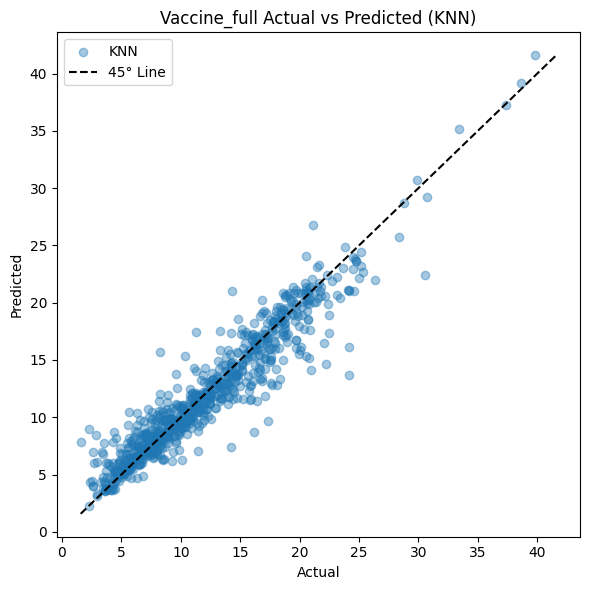

[VACCINE_FULL] Plot saved: /content/vaccine_full_pred_vs_actual.png



In [5]:
# Vaccine uptake model
modeling(
    csv_filename='df_vacc_imputed.csv',
    target_column='smoothed_wcovid_vaccinated',
    prefix='vaccine_full'
)


[POSITIVITY_FULL] 5-Fold CV R² Metrics:
           Model   R² Mean    R² Std
0        Linear  0.619074  0.018374
1         Ridge  0.619109  0.018283
2         Lasso  0.608098  0.014510
3  RandomForest  0.803619  0.014213
4           KNN  0.860832  0.012141
5           MLP  0.833026  0.010501

[POSITIVITY_FULL] Test-Set Metrics:
           Model        R²      RMSE       MAE
0        Linear  0.628891  4.616064  3.589662
1         Ridge  0.628856  4.616286  3.589942
2         Lasso  0.614241  4.706300  3.649406
3  RandomForest  0.831193  3.113271  2.294154
4           KNN  0.904601  2.340417  1.713947
5           MLP  0.853875  2.896566  2.204472

Best model: KNN with R²=0.905


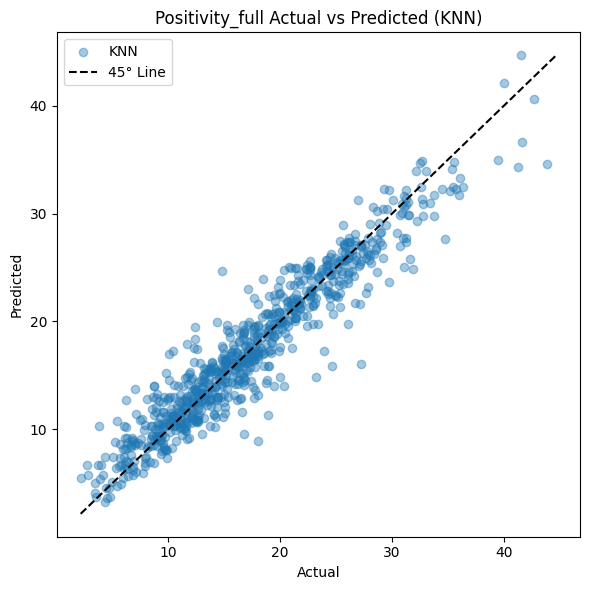

[POSITIVITY_FULL] Plot saved: /content/positivity_full_pred_vs_actual.png



In [ ]:
# Test positivity model
modeling(
    csv_filename='df_pos_imputed.csv',
    target_column='smoothed_wtested_positive_14d',
    prefix='positivity_full'
)


[VACCINE_FULL] 5-Fold CV R² Metrics:
           Model   R² Mean    R² Std
0        Linear  0.530739  0.041529
1         Ridge  0.530751  0.041509
2         Lasso  0.521768  0.037671
3  RandomForest  0.790207  0.021087
4           KNN  0.879142  0.013387
5           MLP  0.818698  0.017615

[VACCINE_FULL] Test-Set Metrics:
           Model        R²      RMSE       MAE
0        Linear  0.535182  4.045570  3.073461
1         Ridge  0.535126  4.045810  3.073687
2         Lasso  0.518415  4.117888  3.114188
3  RandomForest  0.810086  2.585932  1.879538
4           KNN  0.900305  1.873588  1.278803
5           MLP  0.817147  2.537398  1.875818

Best model: KNN with R²=0.900


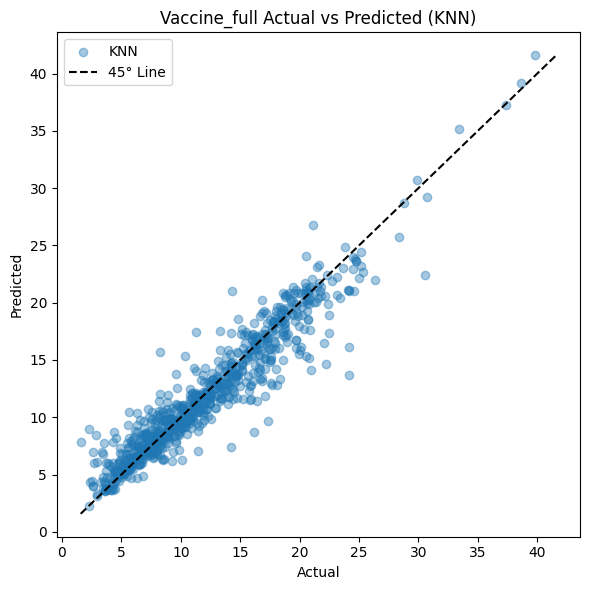

[VACCINE_FULL] Plot saved: /content/vaccine_full_pred_vs_actual.png


[POSITIVITY_FULL] 5-Fold CV R² Metrics:
           Model   R² Mean    R² Std
0        Linear  0.619074  0.018374
1         Ridge  0.619109  0.018283
2         Lasso  0.608098  0.014510
3  RandomForest  0.803619  0.014213
4           KNN  0.860832  0.012141
5           MLP  0.833026  0.010501

[POSITIVITY_FULL] Test-Set Metrics:
           Model        R²      RMSE       MAE
0        Linear  0.628891  4.616064  3.589662
1         Ridge  0.628856  4.616286  3.589942
2         Lasso  0.614241  4.706300  3.649406
3  RandomForest  0.831193  3.113271  2.294154
4           KNN  0.904601  2.340417  1.713947
5           MLP  0.853875  2.896566  2.204472

Best model: KNN with R²=0.905


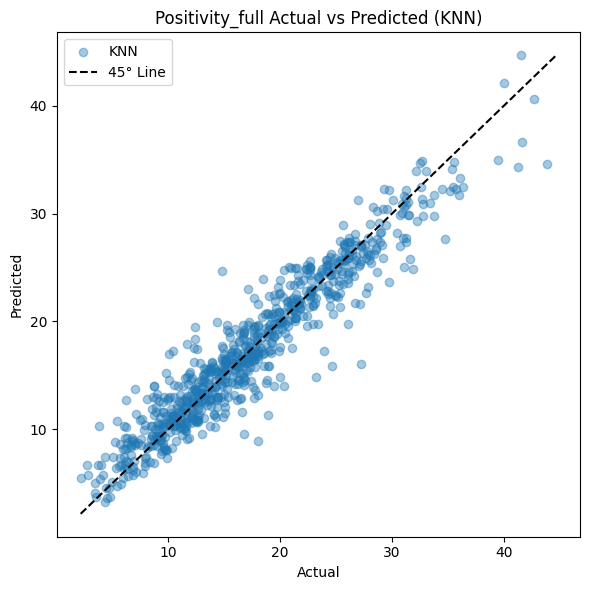

[POSITIVITY_FULL] Plot saved: /content/positivity_full_pred_vs_actual.png



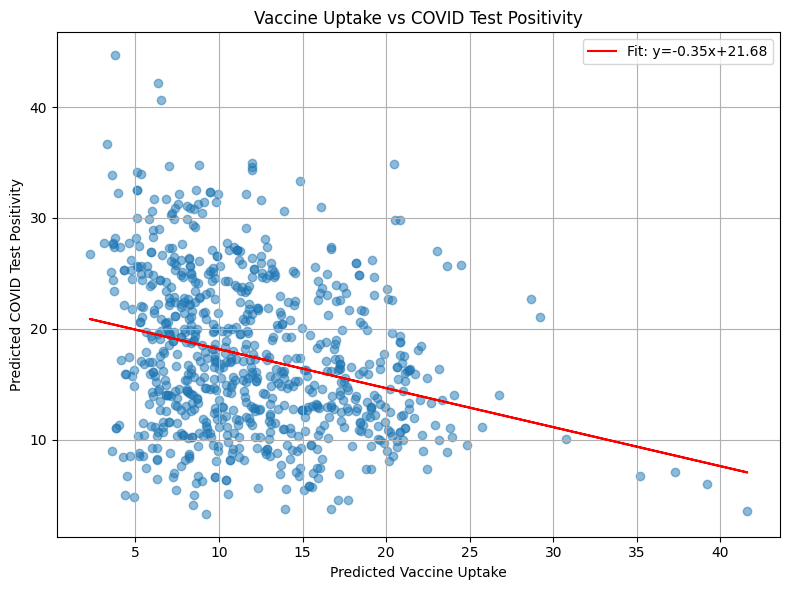

Pearson Correlation: -0.2738
P-Value: 7.2421e-15


In [9]:
#Relationship between vaccine uptake and positivity

vaccine_model, vaccine_Xtest, vaccine_ytest = modeling(
    csv_filename='df_vacc_imputed.csv',
    target_column='smoothed_wcovid_vaccinated',
    prefix='vaccine_full'
)

positivity_model, positivity_Xtest, positivity_ytest = modeling(
    csv_filename='df_pos_imputed.csv',
    target_column='smoothed_wtested_positive_14d',
    prefix='positivity_full'
)

predicted_vacc = vaccine_model.predict(vaccine_Xtest)
predicted_pos = positivity_model.predict(positivity_Xtest)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

merged_df = pd.DataFrame({
    'Predicted_Vaccine_Uptake': predicted_vacc,
    'Predicted_Test_Positivity': predicted_pos
})

plt.figure(figsize=(8,6))
plt.scatter(merged_df['Predicted_Vaccine_Uptake'], merged_df['Predicted_Test_Positivity'], alpha=0.5)
slope, intercept = np.polyfit(merged_df['Predicted_Vaccine_Uptake'], merged_df['Predicted_Test_Positivity'], 1)
plt.plot(merged_df['Predicted_Vaccine_Uptake'], slope * merged_df['Predicted_Vaccine_Uptake'] + intercept, color='red', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
plt.title('Vaccine Uptake vs COVID Test Positivity')
plt.xlabel('Predicted Vaccine Uptake')
plt.ylabel('Predicted COVID Test Positivity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

corr, pval = pearsonr(merged_df['Predicted_Vaccine_Uptake'], merged_df['Predicted_Test_Positivity'])
print(f"Pearson Correlation: {corr:.4f}")
print(f"P-Value: {pval:.4e}")


### Optional: Model with just 4 features

In [ ]:
def modeling_with_4features(csv_filename: str, features:str, target_column: str, prefix: str):
    # 1. Locate and load CSV
    base_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()
    df = pd.read_csv(os.path.join(base_dir, csv_filename))

    # 2. Build predictor list
    # predictors = [c for c in df.columns if c.startswith('smoothed_') and c != target_column]

    # 3. Drop rows with missing target or predictors
    df_clean = df.dropna(subset=features + [target_column]).copy()

    # 4. Extract X, y
    X = df_clean[predictors].values
    y = df_clean[target_column].values

    # 5. Impute and scale features
    X = SimpleImputer(strategy='mean').fit_transform(X)
    X = StandardScaler().fit_transform(X)

    # 6. Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 7. Define models
    models = {
        'Linear':       LinearRegression(),
        'Ridge':        Ridge(alpha=1.0),
        'Lasso':        Lasso(alpha=0.1),
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
        'KNN':          KNeighborsRegressor(n_neighbors=5),
        'MLP':          MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
    }

    # 8. Cross-validation (5-fold) on R²
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_metrics = []
    for name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2', n_jobs=-1)
        cv_metrics.append({
            'Model': name,
            'R² Mean': scores.mean(),
            'R² Std': scores.std()
        })

    cv_df = pd.DataFrame(cv_metrics)
    print(f"\n[{prefix.upper()}] 5-Fold CV R² Metrics:\n", cv_df)

    # 9. Fit & evaluate on test set
    test_metrics = []
    best_r2, best_name, best_model = -np.inf, None, None
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)

        test_metrics.append({
            'Model': name,
            'R²': r2,
            'RMSE': rmse,
            'MAE': mae
        })

        if r2 > best_r2:
            best_r2, best_name, best_model = r2, name, model

    test_df = pd.DataFrame(test_metrics)
    print(f"\n[{prefix.upper()}] Test-Set Metrics:\n", test_df)
    print(f"\nBest model: {best_name} with R²={best_r2:.3f}")

    # 10. Plot Actual vs Predicted
    y_best = best_model.predict(X_test)
    mn, mx = min(y_test.min(), y_best.min()), max(y_test.max(), y_best.max())

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_best, alpha=0.4, label=best_name)
    plt.plot([mn, mx], [mn, mx], 'k--', label='45° Line')
    plt.title(f'{prefix.capitalize()} Actual vs Predicted ({best_name})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.tight_layout()

    plot_file = os.path.join(base_dir, f'{prefix}_pred_vs_actual.png')
    plt.savefig(plot_file)
    plt.show()
    print(f"[{prefix.upper()}] Plot saved: {plot_file}\n")


[VACCINE_4F] 5-Fold CV R² Metrics:
           Model   R² Mean    R² Std
0        Linear  0.268214  0.012969
1         Ridge  0.268214  0.012968
2         Lasso  0.264477  0.012548
3  RandomForest  0.485439  0.015261
4           KNN  0.600303  0.008450
5           MLP  0.400377  0.013430

[VACCINE_4F] Test-Set Metrics:
           Model        R²      RMSE       MAE
0        Linear  0.279820  5.726738  4.442712
1         Ridge  0.279820  5.726738  4.442725
2         Lasso  0.276446  5.740137  4.469065
3  RandomForest  0.513992  4.704447  3.513072
4           KNN  0.666219  3.898678  2.672530
5           MLP  0.433449  5.079328  3.850692

Best model: KNN with R²=0.666


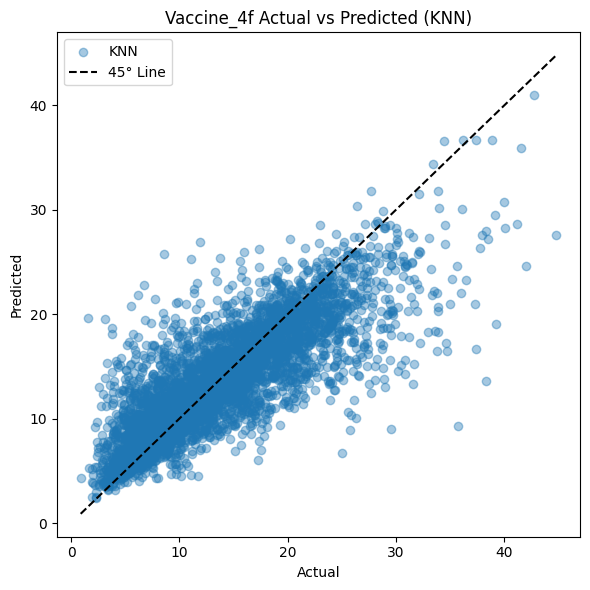

[VACCINE_4F] Plot saved: /content/vaccine_4F_pred_vs_actual.png



In [ ]:
modeling_with_4features(
    csv_filename='df_vacc_imputed.csv',
    features = [
        'smoothed_wshop_1d',
        'smoothed_wwork_outside_home_1d',
        'smoothed_wspent_time_1d',
        'smoothed_wrestaurant_1d'
    ],
    target_column='smoothed_wcovid_vaccinated',
    prefix='vaccine_4F'
)


[POSITIVITY_4F] 5-Fold CV R² Metrics:
           Model   R² Mean    R² Std
0        Linear  0.598086  0.021619
1         Ridge  0.598095  0.021639
2         Lasso  0.585147  0.024494
3  RandomForest  0.779165  0.013435
4           KNN  0.841366  0.011551
5           MLP  0.801632  0.011298

[POSITIVITY_4F] Test-Set Metrics:
           Model        R²      RMSE       MAE
0        Linear  0.569349  5.049141  3.889346
1         Ridge  0.569361  5.049071  3.889084
2         Lasso  0.557815  5.116311  3.915360
3  RandomForest  0.773257  3.663715  2.641181
4           KNN  0.874028  2.730809  1.983854
5           MLP  0.830031  3.172048  2.422074

Best model: KNN with R²=0.874


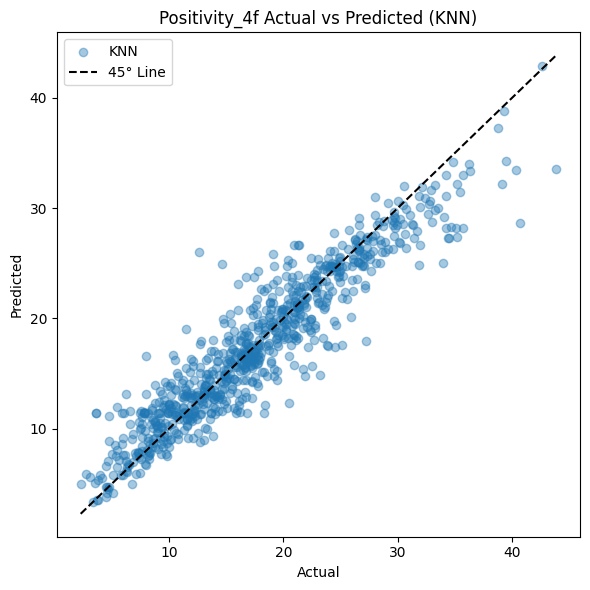

[POSITIVITY_4F] Plot saved: /content/positivity_4F_pred_vs_actual.png



In [ ]:
modeling_with_4features(
    csv_filename='df_pos_imputed.csv',
    features = [
        'smoothed_wcli',
        'smoothed_wothers_masked',
        'smoothed_wlarge_event_1d',
        'smoothed_wpublic_transit_1d'
    ],
    target_column='smoothed_wtested_positive_14d',
    prefix='positivity_4F'
)